In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re

# Define the regular expression pattern that matches the separator between values
pattern = r'\s+'

In [31]:
df = pd.read_csv("seeds_dataset.txt", header=None, names=['Area','Perimeter',
           ' Compactness','  length of kernel',
           ' width of kernel', ' asymmetry coefficient', 
           'length of kernel groove', 'wheat'], sep=pattern)

In [32]:
df.head()

,Area,Perimeter,Compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


1- t-SNE to visalize the data

c:\Users\Mestr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Mestr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


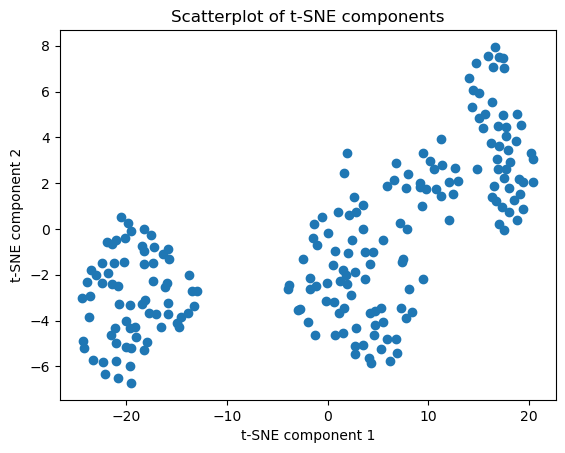

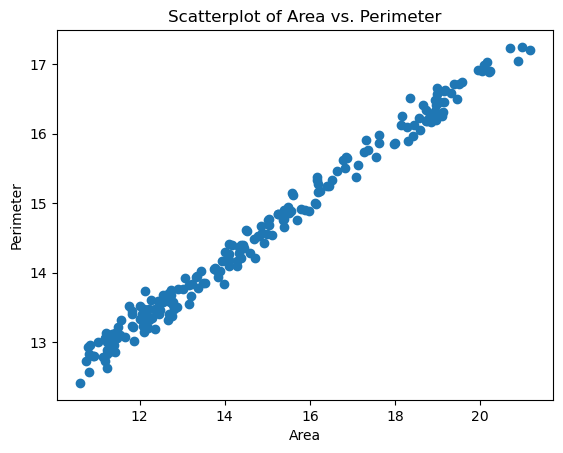

In [33]:
from sklearn.manifold import TSNE

#  t-SNE model
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_tsne = tsne.fit_transform(df)

# scatterplot of t-SNE coordinates
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('Scatterplot of t-SNE components')
plt.show()

# create scatterplot of area vs. perimeter
plt.scatter(df['Area'], df['Perimeter'])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatterplot of Area vs. Perimeter')
plt.show()


2- Cluster the data using K-means, hierarchical clustering, and DBSCAN, and evaluate the performance of each clustering algorithm with adjusted rand index using the adjusted rand score
module in sklearn.

In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

true_labels = df['wheat']

# K-means 
kmeans = KMeans()
kmeans_labels = kmeans.fit_predict(df)

# Hierarchical 
hierarchical = AgglomerativeClustering()
hierarchical_labels = hierarchical.fit_predict(df)

# DBSCAN 
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(df)

# Evaluate clustering performance
kmeans_score = adjusted_rand_score(true_labels, kmeans_labels)
hierarchical_score = adjusted_rand_score(true_labels, hierarchical_labels)
dbscan_score = adjusted_rand_score(true_labels, dbscan_labels)

# Adjusted rand index scores for each 
print('K-means clustering score:', kmeans_score)
print('Hierarchical clustering score:', hierarchical_score)
print('DBSCAN clustering score:', dbscan_score)

K-means clustering score: 0.4259389398685684
Hierarchical clustering score: 0.2394270772976571
DBSCAN clustering score: 0.055717658773885834


3- Split the dataset into a training set (70%) and a test set (30%). Train a logistic regression
model with all features and show the prediction accuracy.

In [35]:
y=df['wheat']

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: wheat, dtype: int64

In [37]:
x = df.drop(df.columns[7], axis=1)

In [38]:
x.head()

,Area,Perimeter,Compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [39]:
#split data into a training set (70%) and a testing set (30%)
#Using such a fixed random_state ensures that our results are reproducible.
#Stratifying to ensure that the division is done in same proportions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1,stratify=y)

In [40]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 70 70 70]
Labels counts in y_train: [ 0 49 49 49]
Labels counts in y_test: [ 0 21 21 21]


In [42]:
#standardize features
#Using the fit method, StandardScaler estimated the parameters, 𝜇 (sample mean) 
#and 𝜎 (standard deviation), for each feature dimension from the training data. 
#By calling the transform method, we then standardized
#the training data using those estimated parameters, 𝜇 and 𝜎 .
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Test 1
LR=LogisticRegression()
LR.fit(X_train_std, y_train)
y_pred = LR.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.937


4-Train a logistic regression model with the first two principal components as features and show
the prediction accuracy.

In [46]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Test 2
LR2 = LogisticRegression(random_state=123)
LR2.fit(X_train_pca, y_train)
y_pred2 = LR2.predict(X_test_pca)
print('Accuracy2: %.3f' % accuracy_score(y_test, y_pred2))

Accuracy2: 0.952


5-Randomly select two original features and train a logistic regression model and show the
prediction accuracy. Compare the prediction accuracies of three logistic regression models,
what do you observe?

In [51]:
import random

# Randomly select two original features
random.seed(123)
feature1 = random.choice(['Area','Perimeter',' Compactness','  length of kernel', ' width of kernel', ' asymmetry coefficient', 'length of kernel groove'])
feature2 = random.choice(['Area','Perimeter',' Compactness','  length of kernel', ' width of kernel', ' asymmetry coefficient', 'length of kernel groove'])
while feature1 == feature2:
    feature2 = random.choice(['Area','Perimeter',' Compactness','  length of kernel', ' width of kernel', ' asymmetry coefficient', 'length of kernel groove'])

print(feature1)
print(feature2)

Area
 Compactness


In [63]:
# Test 3
X_train_random = X_train[[feature1, feature2]]
X_test_random = X_test[[feature1, feature2]]
LR_random = LogisticRegression()
LR_random.fit(X_train_random, y_train)
y_pred_random = LR_random.predict(X_test_random)
print('Accuracy3: %.3f' % accuracy_score(y_test, y_pred_random))

Accuracy3: 0.857


In [ ]:
# PCA has the highest accuracy as its function allow it to capture the most important variation in the data, coming on second LR with all the variables so 
#it has access to the most information and can potentially capture more of the underlying patterns in the data

Breakdown: PCA has the highest accuracy 95% as its function allow it to capture the most important variation in the data, coming on second 93% a LR with all the variables so 
it has access to most information and can potentially capture more of the underlying patterns in the data and on third the random one with 85% , much lower because this
approach only chooses two random features and doesnt use much information such as important variation in the data between the other variables.